<a href="https://colab.research.google.com/github/AidanFeldman/MAT421/blob/main/ModuleBSections17_1_17_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 17.1: Interpolation Problem Statement
If we have a data set and want to estimate the output of an input that is not contained within the dataset but falls within the spread of the data, then we can use *interpolation* to estimate the output.

#Section 17.2: Linear Interpolation

The simplest method of interpolation is linear.In linear interpolation, it is assumed that the data point being estimated lies on the line between the two points nearest on either side.

So a generalized equation to linearly interpolate a data point is $y(x)=y_i+(y_{i+1}−y_i)(x−x_i)/(x_{i+1}−x_i)$, where $x_i$ is the nearest point less than x and $x_{i+1}$ is the nearest point greater than x.

Here $(y_{i+1}−y_i)/(x_{i+1}−x_i)$ is the slope and $y_i$ is the intercept.


In [9]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = [0, 1, 2]
y = [1, 3, 2]
x_h = 0.5
# We can calculate the estimated y when x=0.5 manually. The change in y is 2 and the change in x is 1, so the slope is 2, and the intercept is 1. 0.5*2+1=2
f = interp1d(x, y) # Or we can automate it.
y_hat = f(x_h) # Estimates the y at 0.5
print(y_hat)

2.0


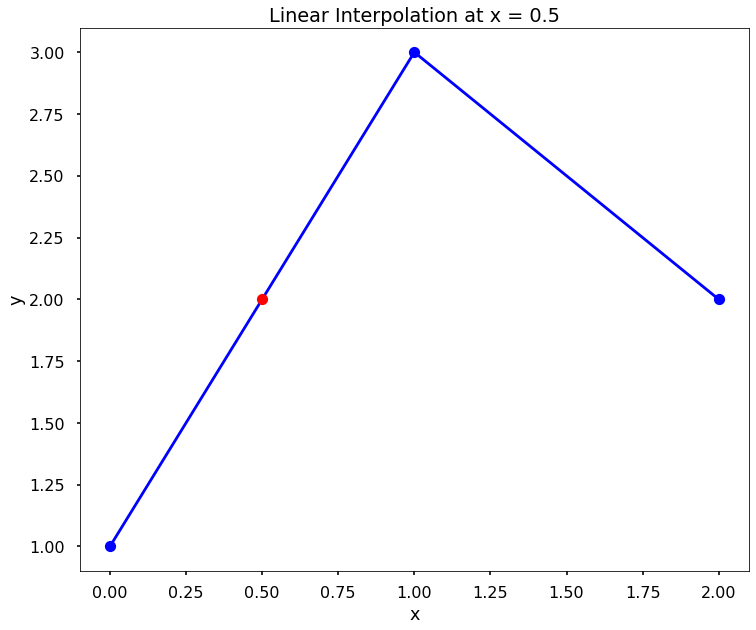

In [12]:
plt.figure(figsize = (12,10))
plt.plot(x, y, '-ob')
plt.plot(x_h, y_hat, 'ro')
plt.title('Linear Interpolation at x = 0.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Section 17.3: Cubic Spline Interpolation

From [Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.03-Cubic-Spline-Interpolation.html)

> Specifically, we assume that the points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$ are joined by a cubic polynomial $S_i(x)=a_ix^3+b_ix^2+c_ix+d_i$ that is valid for $x_i≤x≤x_{i+1}$ for i=1,…,n−1



In [16]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = [0, 1, 2]
y = [5, 1, 3]
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

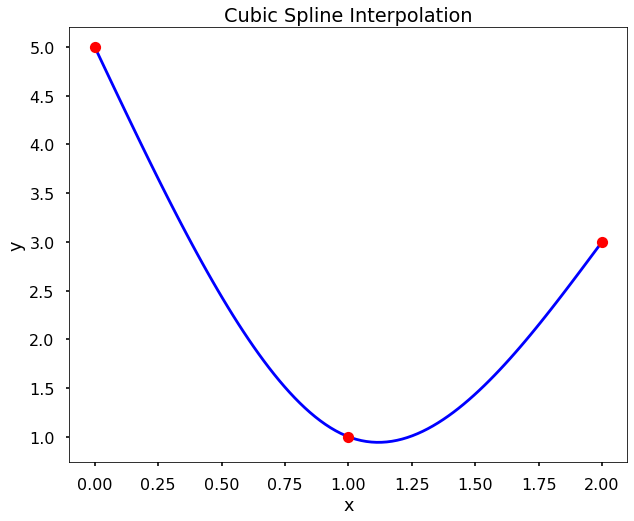

In [17]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Since we have three data points and thus two regions for which to interpolate, we have the following equations:

$a_1x_1^3 + b_1x_1^2 + c_1x_1 + d_1=y_1$

$a_2x_2^3 + b_2x_2^2 + c_2x_2 + d_2=y_2$

$a_1x_2^3 + b_1x_2^2 + c_1x_2 + d_1=y_2$

$a_2x_3^3 + b_2x_3^2 + c_2x_3 + d_2=y_3$

$3a_1x_2^2 + 2b_1x_2 + c_1 - 3a_2x_2^2 - 2b_2x_2 - c_2 = 0$

$6a_1x_2 + 2b_1 - 6a_2x_2 - 2b_2 = 0$

$6a_1x_1 + 2b_1 = 0$

$6a_2x_3 + 2b_2 = 0$

Now plugging in the data points we get:

$d_1=5$

$a_2 + b_2 + c_2 + d_2=1$

$a_1 + b_1 + c_1 + d_1=1$

$8a_2 + 4b_2 + 2c_2 + d_2=3$

$3a_1 + 2b_1 + c_1 - 3a_2 - 2b_2 - c_2 = 0$

$6a_1 + 2b_1 - 6a_2 - 2b_2 = 0$

$2b_1 = 0$

$12a_2 + 2b_2 = 0$

This gives us a matrix we can use to get the equations of interpolation.

In [64]:
b = np.array([5, 1, 1, 3, 0, 0, 0, 0]) # The right side of our equations
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]]) # The left side of our equations: a1,b1,c1,d1,a2,b2,c2,d2 from left to right in each array
c=np.dot(np.linalg.inv(A), b) # To isolate the unknowns, we left multiply the inverse of matrix A
c

array([[  1.5],
       [  0. ],
       [ -5.5],
       [  5. ],
       [ -1.5],
       [  9. ],
       [-14.5],
       [  8. ]])

In [63]:
def interpolate():
  if x>=0 and x<=1:
    y=c[0][0]*(x**3) + c[1][0]*(x**2) + c[2][0]*x + c[3][0] #when 0<x<1, use the coeffecients with the subscript 1
  elif x>=1 and x<=2:
    y=c[4][0]*(x**3) + c[5][0]*(x**2) + c[6][0]*x + c[7][0] #when 1<x<1, use the coeffecients with the subscript 2
  print("when x is", x, "y is approximately", y)
x=0.5
interpolate()
x=1.5
interpolate()

when x is 0.5 y is approximately 2.4375
when x is 1.5 y is approximately 1.4375
